<h1><center>Sprint 5</center></h1>
<h2><center>Tasca 2: Train-Test amb ScikitLearn.</center></h2>

In [1]:
# Packages
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import FunctionTransformer

In [2]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint05/data/'
data_path = Path(data_path)
plot_path = 'D:/Sistema_Solar/Python/itacademy/itacademy-datascience/sprint05/plots/'
plot_path = Path(plot_path)

### Exercici 1
_**Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.**_

_**També adjunt trobaràs una descripció de les diferents variables del dataset.**_

In [3]:
# Apugem l'arxiu csv
file_name = 'housing data.csv'
file = data_path / file_name
housing = pd.read_csv(file, sep=',', encoding="ISO-8859-1")

# Afegim els noms de les columnes
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.columns = colnames

In [4]:
# Separem el dataframe en un conjunt per entrenar el model i un altre per aplicar-lo.
housing_train, housing_test = train_test_split(housing, test_size=0.2)

In [5]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 480 to 443
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


In [6]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 271 to 462
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    float64
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 11.8 KB


El dataset conté 14 variables diferents amb 404 files per al conjunt train i 101 per al conjunt test, no hi ha cap camp amb dades NA i es troben en format númeric.

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [7]:
housing_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
480,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666.0,20.2,393.07,7.74,23.7
74,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398.0,18.7,383.23,8.94,21.4
221,0.62356,0.0,6.20,1,0.507,6.879,77.7,3.2721,8,307.0,17.4,390.39,9.93,27.5
111,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432.0,17.8,394.95,16.21,18.8
56,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,31.6


In [8]:
housing_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
271,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73,24.4
170,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403.0,14.7,348.13,12.03,19.1
239,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300.0,16.6,391.25,11.38,22.0
25,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
340,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284.0,15.5,394.74,5.49,32.7


In [9]:
print(housing_train.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.777224   12.002475   10.962723    0.069307    0.556891    6.300965   
std      8.936419   24.178231    6.866322    0.254290    0.118953    0.728355   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.079365    0.000000    5.130000    0.000000    0.449000    5.878750   
50%      0.256355    0.000000    8.560000    0.000000    0.538000    6.209000   
75%      3.713577   13.750000   18.100000    0.000000    0.631000    6.655500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.601485    3.778924    9.631188  408.715347   18.403465  358.260941   
std     28.151312    2.1438

In [10]:
print(housing_test.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     2.994438    8.742574   11.920396    0.069307    0.546078    6.216436   
std      7.153506   19.544003    6.793661    0.255242    0.103387    0.590340   
min      0.013010    0.000000    1.470000    0.000000    0.403000    4.906000   
25%      0.088730    0.000000    5.960000    0.000000    0.449000    5.914000   
50%      0.290900    0.000000   10.590000    0.000000    0.538000    6.172000   
75%      2.818380    0.000000   18.100000    0.000000    0.609000    6.442000   
max     51.135800   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean    68.501980    3.856598    9.306931  407.435644   18.695050  349.928119   
std     28.417027    1.9657

Al trobar-se en format numèric es facilita l'estudi, ja que no cal convertir-les. Alguns camps representen percentatges, com 'ZN' o 'LSTAT' mentre que 'CHAS' es una dummy variable prenent valors d'1 o 0 en funció de si es compleix o no una condició. MEDV presenta en ambdós casos un valor màxim de 50, cosa que pot significar que s'exclouen habitatges amb valors superiors o es mostra com a màxim aquest valor.

#### Matriu de Correlació i Histogrames Generals

##### Subconjunt d'entrenament

In [11]:
housing_train_matrix = housing_train.corr()

# Eliminarem les correlacions entre iguals per millorar la visualització posterior
for i in range(len(housing_train_matrix.columns)):
    for j in range(len(housing_train_matrix.columns)):
        if i == j:
            housing_train_matrix.iloc[i][j] = np.nan

<AxesSubplot:>

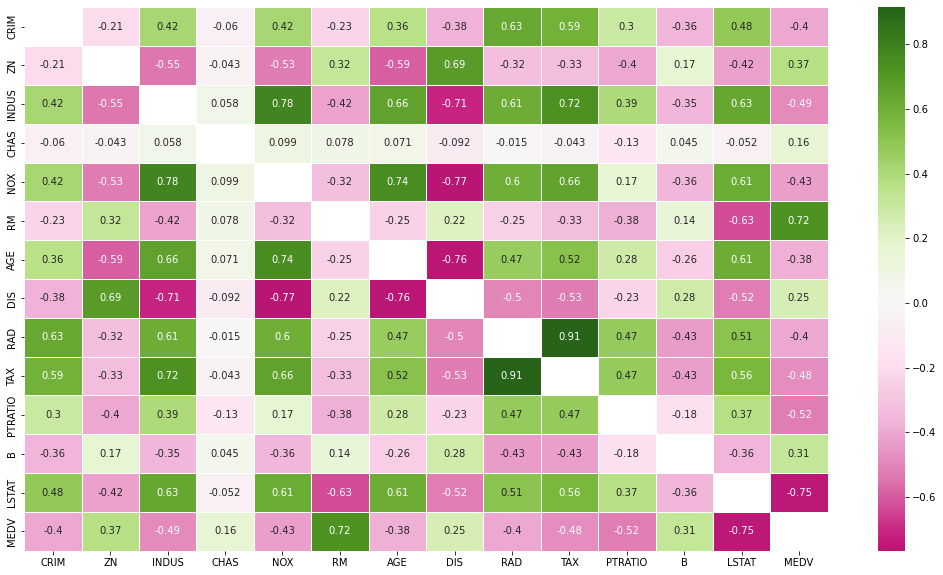

In [12]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(housing_train_matrix, annot=True, linewidth=.5, ax=ax, cmap="PiYG", center=0)

Aquest heat map ens pot donar una visió ràpida de quines variables poden estar més relacionades. Així, trobem grans correlacions positives entre TAX i RAD, AGE i NOX, NOX i INDUS.
En canvi, les correlacions negatives més importants es donen amb DIS-INDUS, DIS-NOX, DIS-AGE.
Respecte a MEDV, les variables que més es troben correlacionades són: LSTAT, PTRATIO, TAX, RM, NOX, INDUS i CRIM.

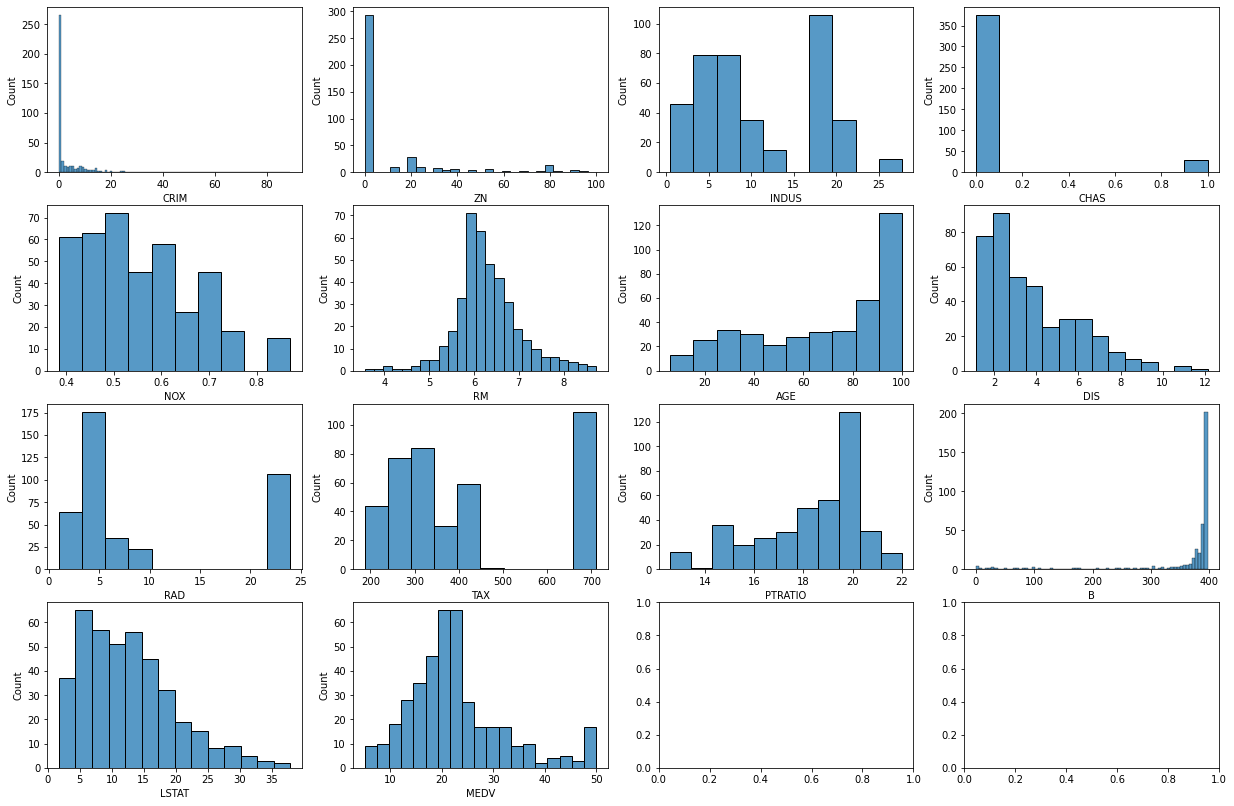

In [13]:
fig, ax = plt.subplots(4, 4, figsize=(21,14))
nrow = 0
ncol = 0

for col in housing_train.columns:
    sns.histplot(housing_train[col], ax=ax[nrow][ncol])
    ncol += 1
    if ncol == 4:
        nrow += 1
        ncol = 0

Els histogrames ens permeten visualitzar la distribució de cadascuna de les variables. Així, algunes variables mostren una distribució amb un màxim molt desviat cap a un dels extrems, com és en el cas dels CRIMS, ZN i DIS que tenen els màxims propers a valors petits. AGE i PTRATIO, properes a valors alts. Algunes variables mostren distribucions bimodals, com TAX, RAD o INDUS que tenen dos màxims. Mentre que també trobem variables amb distribució normal com MEDV i sobretot, RM. 

##### Subconjunt test

Vegem si en el subconjunt test es similar el comportament.

In [14]:
housing_test_matrix = housing_test.corr()

# Eliminarem les correlacions entre iguals per millorar la visualització posterior
for i in range(len(housing_test_matrix.columns)):
    for j in range(len(housing_test_matrix.columns)):
        if i == j:
            housing_test_matrix.iloc[i][j] = np.nan

<AxesSubplot:>

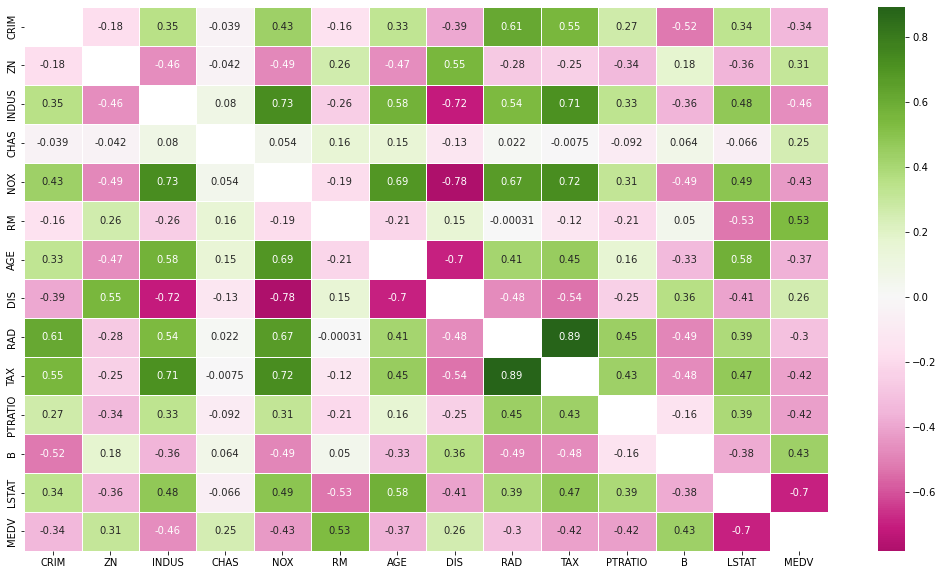

In [15]:
fig, ax = plt.subplots(figsize=(18,10)) 

sns.heatmap(housing_test_matrix, annot=True, linewidth=.5, ax=ax, cmap="PiYG", center=0)

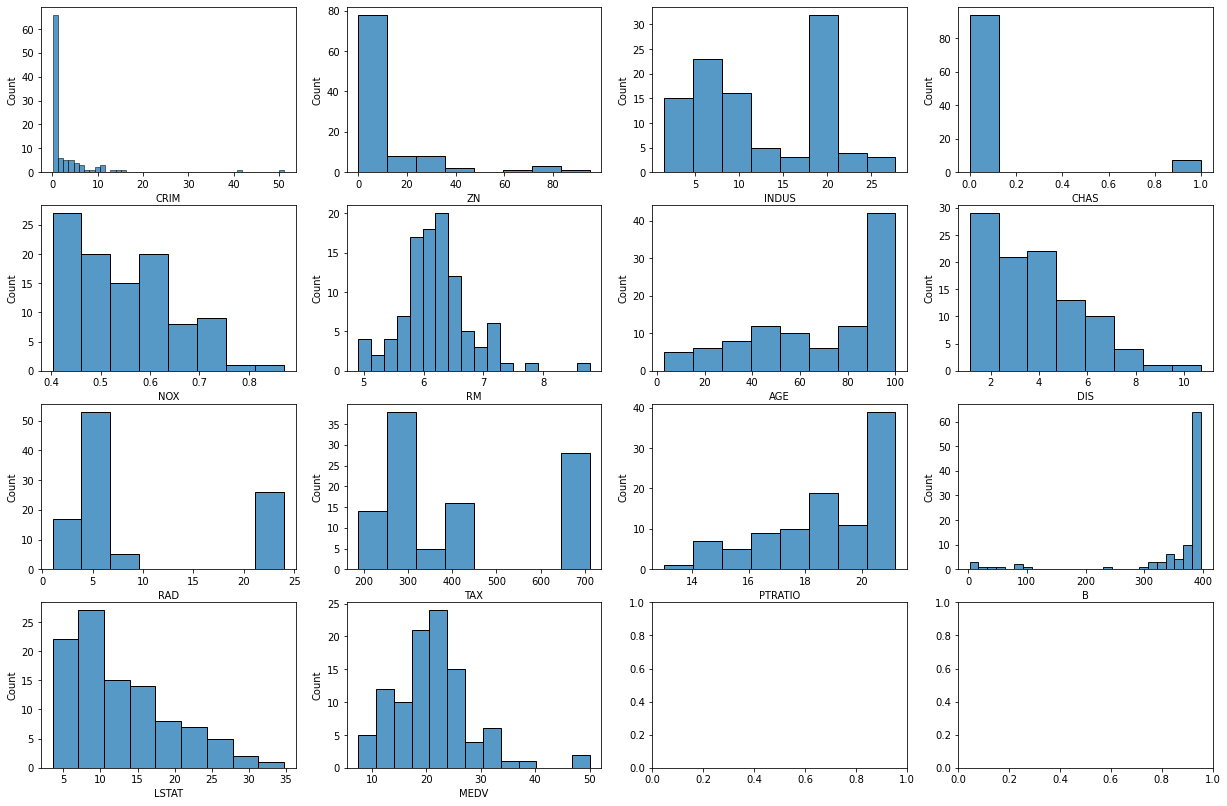

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(21,14))
nrow = 0
ncol = 0

for col in housing_test.columns:
    sns.histplot(housing_test[col], ax=ax[nrow][ncol])
    ncol += 1
    if ncol == 4:
        nrow += 1
        ncol = 0

#### Anàlisis MEDV

##### Subconjunt d'entrenament

Ara analitzem més en profunditat algunes de les variables. Comencem amb la relació de MEDV amb les altres variables.

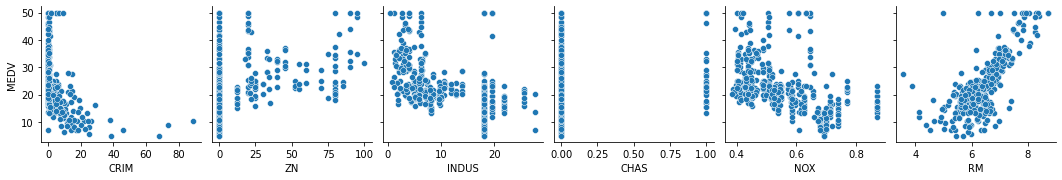

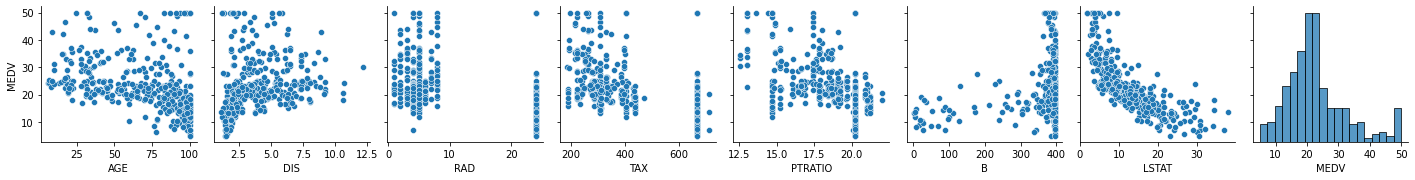

In [17]:
plt.show(sns.pairplot(
    housing_train,
    y_vars=["MEDV"],
    x_vars=housing_train.columns[0:6],
))

plt.show(sns.pairplot(
    housing_train,
    y_vars=["MEDV"],
    x_vars=housing_train.columns[6:],
))

In [18]:
housing_train_matrix['MEDV']

CRIM      -0.399883
ZN         0.365936
INDUS     -0.488199
CHAS       0.163004
NOX       -0.431585
RM         0.720541
AGE       -0.381474
DIS        0.250964
RAD       -0.400937
TAX       -0.483541
PTRATIO   -0.521914
B          0.314213
LSTAT     -0.749887
MEDV            NaN
Name: MEDV, dtype: float64

Algunes variables es troben correlacionades positivament amb MEDV. Així, sembla haver-hi una clara correlació positiva amb RM. Les cases on conviu més gent, estan millor valorades. Aquestes poden ser més grans i més cares, per exemple.

També amb DIS, el valor s'incrementa en allunyar-se de les zones que més ocupació donen tot i que també trobem valors alts de MEDV amb DIS baixos. Als Estats Units l'ús del cotxe es troba molt estès i les ciutats estan planejades per al seu ús intensiu. Així, pot parèixer que les zones residencials moderadament distanciades dels llocs de treball poden ser tindre una gran valoració. En canvi, si la distància és molt gran, perd valor.

Altres variables mostren correlació negativa. Més clara amb la taxa de crims (CRIM), el % de població de classe baixa (LSTAT) o la taxa alumnes-professor (PTRATIO) i també present a INDUS, NOX, TAX.

Amb CHAS pot parèixer que les zones properes al riu Charles tinguin una distribució de MEDV diferent, encara que aquest pot ser producte de la menor quantitat de municipis propers a aquest riu. I amb AGE sembla que hi ha una correlació negativa tot i que també es donen valors elevats de MEDV amb valors alts d'AGE, cosa que es pot entendre, ja que podem trobar urbanitzacions amb edificis o cases antigues però amb un valor molt alt.

##### Subconjunt de test

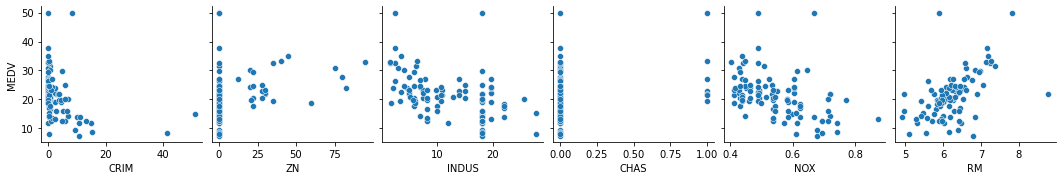

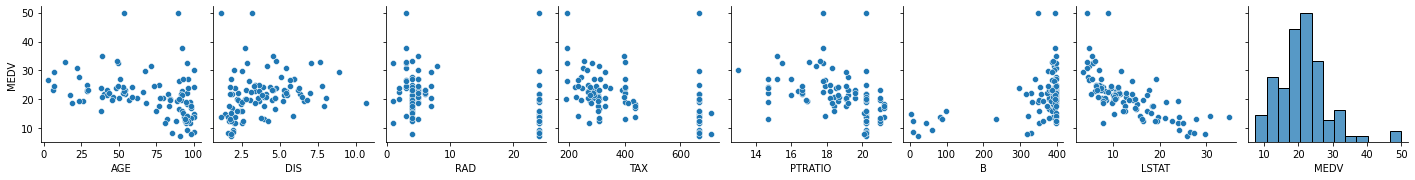

In [19]:
plt.show(sns.pairplot(
    housing_test,
    y_vars=["MEDV"],
    x_vars=housing_test.columns[0:6],
))

plt.show(sns.pairplot(
    housing_test,
    y_vars=["MEDV"],
    x_vars=housing_test.columns[6:],
))

In [20]:
housing_test_matrix['MEDV']

CRIM      -0.338891
ZN         0.307782
INDUS     -0.463077
CHAS       0.246520
NOX       -0.429495
RM         0.528256
AGE       -0.370050
DIS        0.256987
RAD       -0.304796
TAX       -0.415464
PTRATIO   -0.420044
B          0.432592
LSTAT     -0.698693
MEDV            NaN
Name: MEDV, dtype: float64

#### Anàlisis NOX

##### Subconjunt d'entrenament

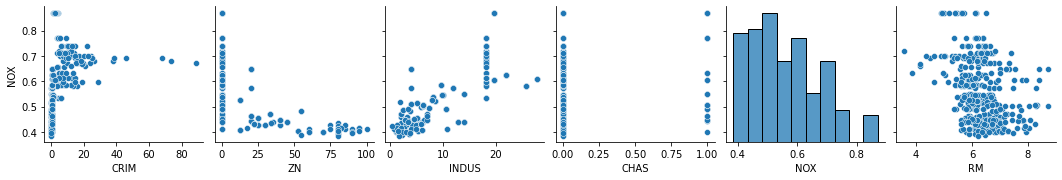

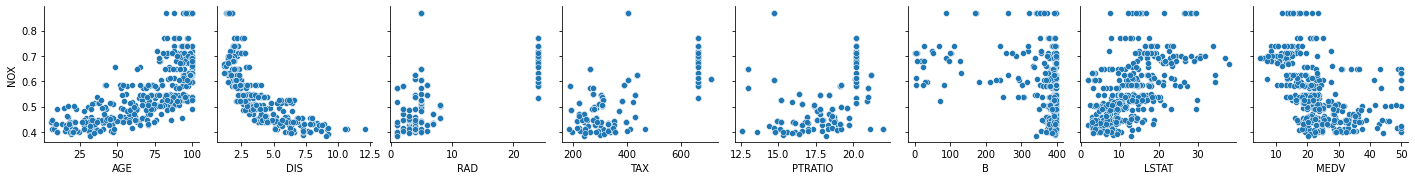

In [21]:
plt.show(sns.pairplot(
    housing_train,
    y_vars=["NOX"],
    x_vars=housing_train.columns[0:6],
))

plt.show(sns.pairplot(
    housing_train,
    y_vars=["NOX"],
    x_vars=housing_train.columns[6:],
))

Les concentracions d'òxid de nitrogen es troben associades al trànsit i les indústries. Així, comprovem com hi ha una correlació positiva entre les concentracions de NOx i la variable INDUS, relacionat amb la indústria ja que són empreses no dedicades al comerç i que es poden ubicar preferentment en polígons industrials i produir emissions contaminants. Respecte a DIS, sembla que es correlaciona negativament amb NOx. DIS proporciona informació sobre la proximitat a una de les 5 zones que més ocupació donen en Boston, on es pot esperar alt volum de trànsit o indústries, així que no sorprèn aquesta correlació. Respecte l'edat dels edificis (AGE), sembla que els més vells es troben en zones amb concentracions majors de NOx. La correlació amb MEDV sembla negativa, podem esperar valors més alts de les cases allà on els NOx són més baixos, ja que poden ser urbanitzacions allunyades de zones industrials, de grans centres urbans o vies de comunicació amb alt valor adquisitiu. Alhora, la proximitat a zones urbanes dinàmiques amb altes concentracions de NOx també pot encarir els preus.

##### Subconjunt de test

#### Anàlisis B

##### Subconjunt d'entrenament

L'índex B representa una mica de dificultat en la seua comprensió. Per entendre millor que vol dir el índex B, mostrem en una gráfica la relació entre aquest índex i el percentatge de gent negra. S'aprecia que pels valors màxims de l'índex (quasi 400), el % de població negra és de 0%. Si el index es 0, aleshores el percentatge es de 60% mentre que percentatges superiors al 60% de gent negre tornen a donar valors superiors als 0. Això vol dir que un B de 100 pot indicar un percentatge del 37% o del 100%. Es possible que aquest index estiga estandaritzat al percentatge màxim de negres en una zona determinada, i per tant aquest seria del 63% quan l'índex és 0.

De totes formes, la transformació feta al percentatge de població negra pot donar problemes d'interpretació ja que la funció aplicada no es (inyectiva), ho siga, diferents valors de % de població negra no dona sempre valors diferents de B. Per tant, no podem desfer aquesta transformació.

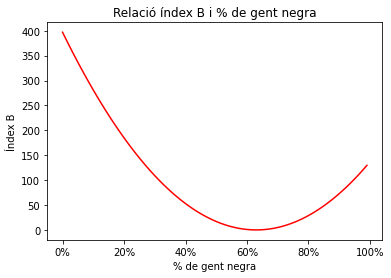

In [22]:
Bk = np.arange(0, 1, 0.01)
B = 1000*(Bk - 0.63)**2

fig, ax = plt.subplots()
plt.plot(Bk, B, 'r')

plt.xlabel('% de gent negra')
plt.ylabel('Índex B')
xticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']
ax.xaxis.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticklabels(xticks_labels)
plt.show(plt.title('Relació índex B i % de gent negra'))

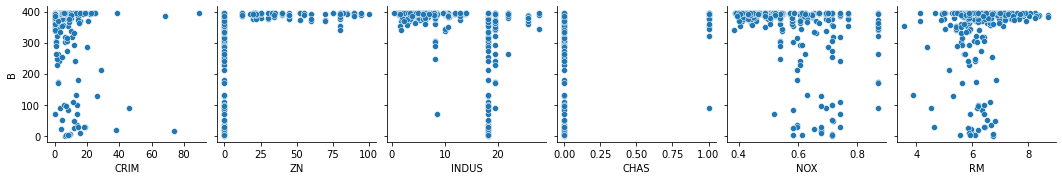

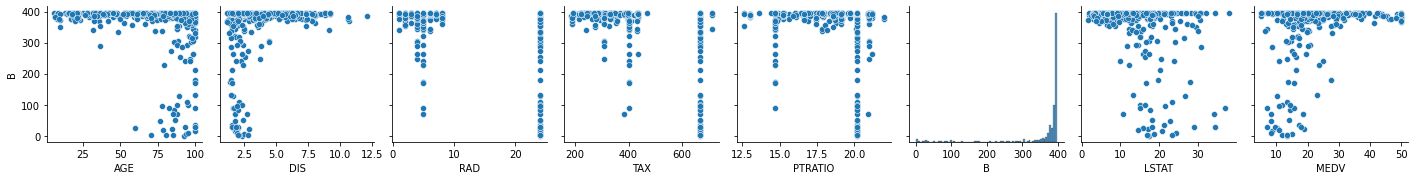

In [23]:
plt.show(sns.pairplot(
    housing_train,
    y_vars=["B"],
    x_vars=housing_train.columns[0:6],
))

plt.show(sns.pairplot(
    housing_train,
    y_vars=["B"],
    x_vars=housing_train.columns[6:],
))

In [24]:
housing_train_matrix['B']

CRIM      -0.360501
ZN         0.174147
INDUS     -0.354105
CHAS       0.044909
NOX       -0.357491
RM         0.144536
AGE       -0.257896
DIS        0.276778
RAD       -0.432345
TAX       -0.431105
PTRATIO   -0.180032
B               NaN
LSTAT     -0.361502
MEDV       0.314213
Name: B, dtype: float64

S'observa una correlació negativa de l'índex amb la variable 'CRIM', amb l'accessibilitat (RAD) o el valor de les taxes de propietat (TAX). També presenta correlació negativa LSTAT mentre que amb 'MEDV', es veu una correlació positiva.

Podem estudiar aquesta variable separant pohblacions amb una B alta, amb les que tenen una B baixa.

In [25]:
filter_highB = housing_train['B'] > 350
filter_lowB = housing_train['B'] < 200

housing_train_highB = housing_train[filter_highB]
housing_train_lowB = housing_train[filter_lowB]

print('Mitjanes NOx')
print('Índex B alt:' + str(round(housing_train_highB['NOX'].mean(), 2)))
print('Índex B baix:' + str(round(housing_train_lowB['NOX'].mean(), 2)) + '\n')

print('Mitjanes LSTAT')
print('Índex B alt:' + str(round(housing_train_highB['LSTAT'].mean(), 1)))
print('Índex B baix:' + str(round(housing_train_lowB['LSTAT'].mean(), 1)) + '\n')

print('Mitjanes TAX')
print('Índex B alt:' + str(round(housing_train_highB['TAX'].mean(), 0)))
print('Índex B baix:' + str(round(housing_train_lowB['TAX'].mean(), 0)) + '\n')

print('Mitjanes MEDV')
print('Índex B alt:' + str(round(housing_train_highB['MEDV'].mean(), 1)))
print('Índex B baix:' + str(round(housing_train_lowB['MEDV'].mean(), 1)) + '\n')

Mitjanes NOx
Índex B alt:0.54
Índex B baix:0.69

Mitjanes LSTAT
Índex B alt:11.5
Índex B baix:20.8

Mitjanes TAX
Índex B alt:380.0
Índex B baix:630.0

Mitjanes MEDV
Índex B alt:24.2
Índex B baix:13.4



A primera vista, podem concloure que els municipis amb més proporció de gent negra tenen concentracions de NOx majors, hi ha més població amb rendes baixes i el valor de les cases ocupades és menor.

De totes maneres, aquest índex sembla confeccionat amb la idea que les zones amb menys mestissatge tenen preus de les propietats majors. I podria alterar els resultats i pot ser convenient prescindir d'ell.

#### Anàlisis LSTAT

##### Subconjunt d'entrenament

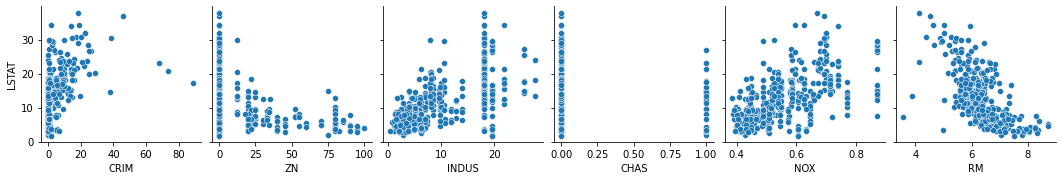

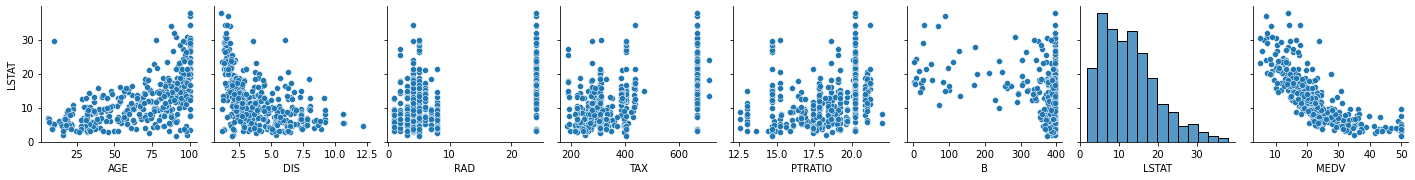

In [26]:
plt.show(sns.pairplot(
    housing_train,
    y_vars=["LSTAT"],
    x_vars=housing_train.columns[0:6],
))

plt.show(sns.pairplot(
    housing_train,
    y_vars=["LSTAT"],
    x_vars=housing_train.columns[6:],
))

In [27]:
housing_train_matrix['LSTAT']

CRIM       0.480309
ZN        -0.424687
INDUS      0.633274
CHAS      -0.051816
NOX        0.613216
RM        -0.631783
AGE        0.608678
DIS       -0.517372
RAD        0.512529
TAX        0.561492
PTRATIO    0.368750
B         -0.361502
LSTAT           NaN
MEDV      -0.749887
Name: LSTAT, dtype: float64

LSTAT, el percentatge de població de classe més baix es troba fortament correlacionada negativament amb MEDV. Així, els habitatges tenen valors inferiors. També té correlació negativa amb RM, conviuen menys gent o es troben més allunyats de les zones de treball. En canvi, hi ha més crims, hi ha més indústria i el PTRATIO és superior.

### Exercici 2 & Exercici 3

- _**Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).**_

- _**Resumeix les noves columnes generades de manera estadística i gràfica**_

Aquest dataset ens pot donar la informació per poder entrenar un model per predir els preus dels habitatges a partir dels diferents factors que s'inclouen. Podem transformar aquelles variables que tenen més correlació amb MEDV i podran servir per construir un model de predicció.

#### NOX

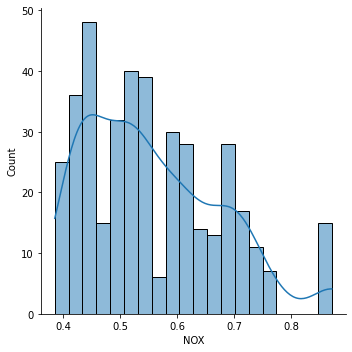

In [28]:
plt.show(sns.displot(housing_train['NOX'], bins=20, kde=True))

NOX presenta una distribució asimètrica, podem intentar normalitzar-la amb una transformació logarítmica.

In [29]:
transformer = FunctionTransformer(np.log1p)

NOX_reshaped = np.array(housing_train['NOX']).reshape(-1, 1)
transformer.fit(NOX_reshaped)

NOX_transformed = transformer.fit_transform(NOX_reshaped)

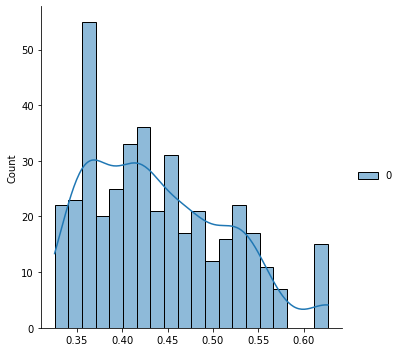

In [30]:
plt.show(sns.displot(NOX_transformed, bins=20, kde=True))

In [31]:
print('Skewness original data: ' + str(stats.skew(housing_train['NOX'])))
print('Skewness transformed data: ' + str(stats.skew(NOX_transformed)[0]))

Skewness original data: 0.7231072034090422
Skewness transformed data: 0.5771906273328334


Efectivament, s'observa una reducció en l'asimetria positiva de la distribució de les dades de NOX, així i tot, aquesta continua sent asimètrica.

#### DIS

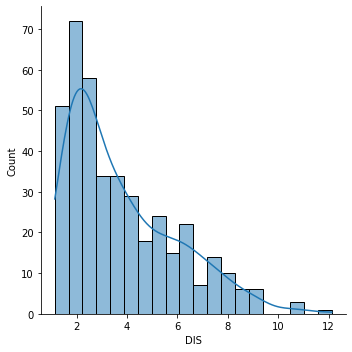

In [32]:
plt.show(sns.displot(housing_train['DIS'], bins=20, kde=True))

Aquesta variable es pot aplicar una estandarització.

In [33]:
scaler = StandardScaler()

dist_reshaped = np.array(housing_train['DIS']).reshape(-1, 1)
dist_scaled = scaler.fit_transform(dist_reshaped)

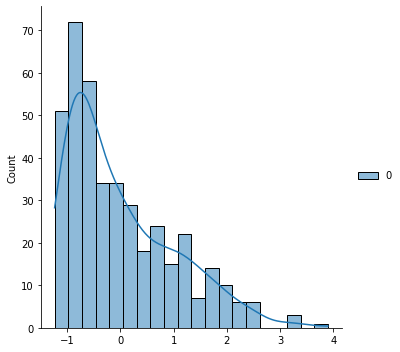

In [34]:
plt.show(sns.displot(dist_scaled, bins=20, kde=True))

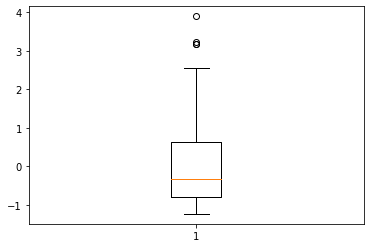

In [35]:
plt.show(plt.boxplot(dist_scaled))

Text(0.5, 1.0, 'Estandaritzat')

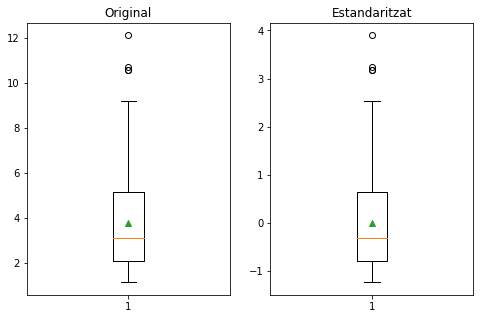

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(8,5))

ax[0].boxplot(housing_train['DIS'], showmeans=True)
ax[0].set_title('Original')

ax[1].boxplot(dist_scaled, showmeans=True)
ax[1].set_title('Estandaritzat')

In [37]:
print('Mitjanes dades original: ' + str(housing_train['DIS'].mean()))
print('Mitjanes dades estandaritzades: ' + str(dist_scaled.mean()))

print('Desviació estàndard dades originals: ' + str(np.std(housing_train['DIS'])))
print('Desviació estàndard dades estandaritzades: ' + str(np.std(dist_scaled)))

Mitjanes dades original: 3.7789237623762397
Mitjanes dades estandaritzades: -1.407015318336832e-16
Desviació estàndard dades originals: 2.141164999949703
Desviació estàndard dades estandaritzades: 1.0


L'estandardització permet centrar les dades en el valor zero (la mitjana de les dades estandarditzades és pràcticament zero) i la desviació estàndard és 1.

#### LSTAT

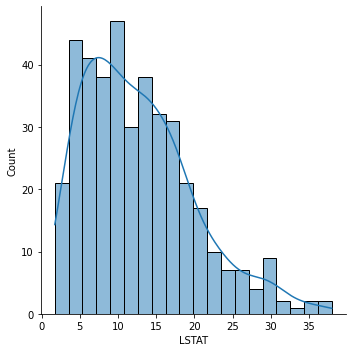

In [38]:
plt.show(sns.displot(housing_train['LSTAT'], bins=20, kde=True))

Presenta una distribució asimétrica amb una cua més llarga a la dreta, així que es pot aplicar una transformació logarítmica per normalitzar-la.

In [39]:
LSTAT_reshaped = np.array(housing_train['LSTAT']).reshape(-1, 1)
transformer = FunctionTransformer(np.log1p)
transformer.fit(LSTAT_reshaped)
LSTAT_transformed = transformer.fit_transform(LSTAT_reshaped)

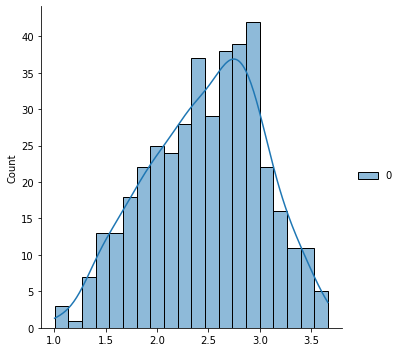

In [40]:
plt.show(sns.displot(LSTAT_transformed, bins=20, kde=True))

In [41]:
print('Skewness original: ' + str(stats.skew(housing_train['LSTAT'])))
print('Skewness transformada: ' + str(stats.skew(LSTAT_transformed)[0]))

Skewness original: 0.8800400885537629
Skewness transformada: -0.24318963066507915


En aquest cas, es redueix més l'asimetria de la distribució, inclús es fa negativa.

A continuació podem estandarditzar els valors, substraent la mitjana i escalant perquè tinguen una variança d'1.

In [42]:
scaler = StandardScaler()

LSTAT_stand = scaler.fit_transform(LSTAT_transformed)

print(LSTAT_stand.mean())
print(np.std(LSTAT_stand))

-2.41830757839143e-17
0.9999999999999998


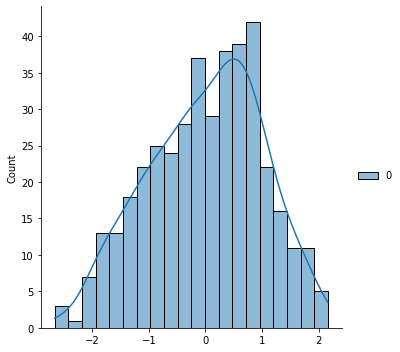

In [43]:
plt.show(sns.displot(LSTAT_stand, bins=20, kde=True))

In [44]:
print('Mitjanes dades original: ' + str(housing_train['LSTAT'].mean()))
print('Mitjanes dades estandaritzades: ' + str(LSTAT_stand.mean()))

print('Desviació estàndard dades originals: ' + str(np.std(housing_train['LSTAT'])))
print('Desviació estàndard dades estandaritzades: ' + str(np.std(LSTAT_stand)))

Mitjanes dades original: 12.649108910891092
Mitjanes dades estandaritzades: -2.41830757839143e-17
Desviació estàndard dades originals: 7.182153018297329
Desviació estàndard dades estandaritzades: 0.9999999999999998


#### INDUS

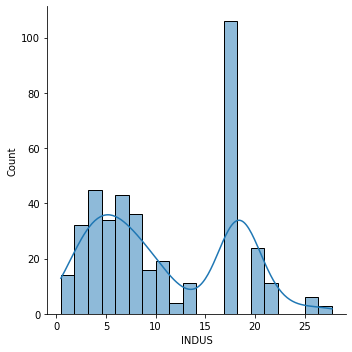

In [45]:
plt.show(sns.displot(housing_train['INDUS'],  bins = 20, kde=True)) # Es fa PowerTransformer per millorar una mica la distribució però no s'aconsegueix massa.

Presenta una distribució bi-modal, podem provar una transformació amb potències, gràcies a la funció PowerTransformer que elegeix la que millor s'ajusta.

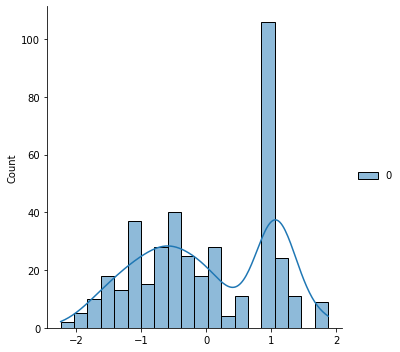

In [46]:
scaler = PowerTransformer(method = 'yeo-johnson', standardize=True)

INDUS_reshaped = np.array(housing_train['INDUS']).reshape(-1, 1)

INDUS_transformed = scaler.fit_transform(INDUS_reshaped)

plt.show(sns.displot(INDUS_transformed, bins = 20, kde=True))

La distribució s'assembla més a una distribució normal tot i que continua presentant bimodalitat.

In [47]:
print('Skewness original data: ' + str(stats.skew(housing_train['INDUS'])))
print('Skewness transformed data: ' + str(stats.skew(INDUS_transformed)[0]))

Skewness original data: 0.31344361871960347
Skewness transformed data: -0.09705330176513087


#### PTRATIO

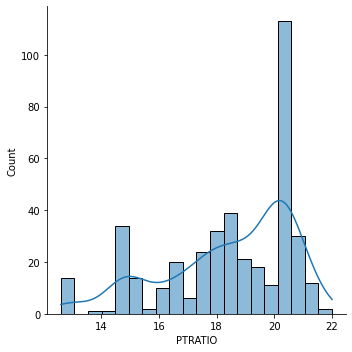

In [48]:
plt.show(sns.displot(housing_train['PTRATIO'], bins=20, kde=True))

La distribució de PTRATIO és notablement asimètrica cap a l'esquerra. De nou, podem aplicar una transformació amb potències.

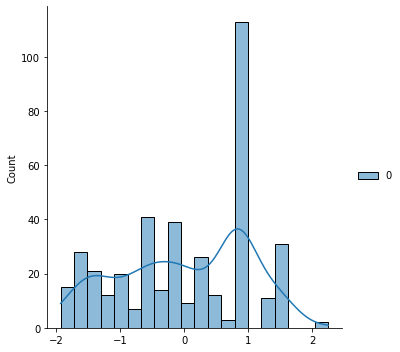

In [49]:
scaler = PowerTransformer(method='yeo-johnson', standardize=True)

PTRATIO_reshaped = np.array(housing_train['PTRATIO']).reshape(-1, 1)

PTRATIO_transformed = scaler.fit_transform(PTRATIO_reshaped)

plt.show(sns.displot(PTRATIO_transformed, bins=20, kde=True))

In [50]:
print('Skewness original: ' + str(stats.skew(housing_train['PTRATIO'])))
print('Skewness transformat: ' + str(stats.skew(PTRATIO_transformed)[0]))

Skewness original: -0.7846885549635918
Skewness transformat: -0.221675256878379


La transformació aplicada normalitza la distribució tot i que es troba afectada notablement pel màxim prop d'1.

#### RM

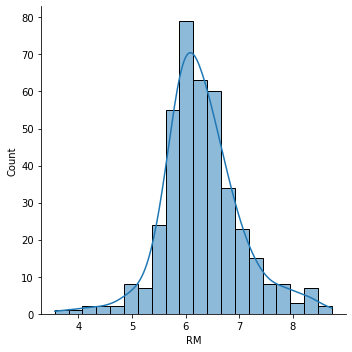

In [51]:
plt.show(sns.displot(housing_train['RM'], bins=20, kde=True))

La distribució fa pensar que potser té una distribució més normal que d'altres casos.

In [52]:
print('Skewness original: ' + str(stats.skew(housing_train['RM'])))
print('Test de skewness dades originals: ' + str(stats.skewtest(housing_train['RM'])))

Skewness original: 0.3190248756800956
Test de skewness dades originals: SkewtestResult(statistic=2.6040449646470982, pvalue=0.009213066890287898)


Cosa que no sembla complir-se. Així que apliquem una transformació logarítmica.

In [53]:
RM_reshaped = np.array(housing_train['RM']).reshape(-1, 1)
transformer = FunctionTransformer(np.log1p)
transformer.fit(RM_reshaped)
RM_transformed = transformer.fit_transform(RM_reshaped)

In [54]:
print('Skewness original: ' + str(stats.skew(RM_transformed)))
print('Test de skewness dades originals: ' + str(stats.skewtest(RM_transformed)))

Skewness original: [-0.27203134]
Test de skewness dades originals: SkewtestResult(statistic=array([-2.23388808]), pvalue=array([0.02549044]))


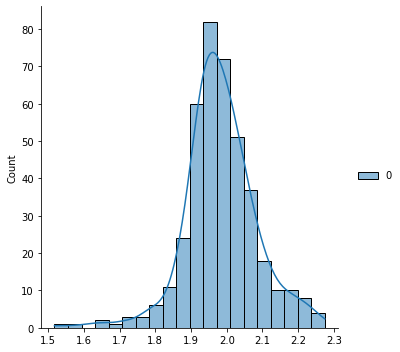

In [55]:
plt.show(sns.displot(RM_transformed, bins=20, kde=True))

En aquest cas, s'aconsegueix una distribució notablement normal.

#### TAX

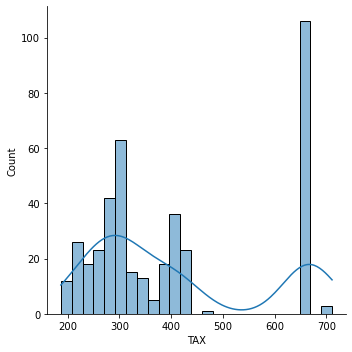

In [56]:
plt.show(sns.displot(housing_train['TAX'], bins=25, kde=True))

Distribució afectada fortament pel màxim entre 600 i 700. Es pot tornar a aplicar una transformació amb potències o també amb quantils, tot i que el nombre de dades pot ser massa baix perquè sigui adequada aquesta última transformació.

In [57]:
TAX_reshaped = np.array(housing_train['TAX']).reshape(-1, 1)

qt = QuantileTransformer(
    n_quantiles=75, output_distribution="normal")
qt.fit(TAX_reshaped)

TAX_qt = qt.transform(TAX_reshaped)

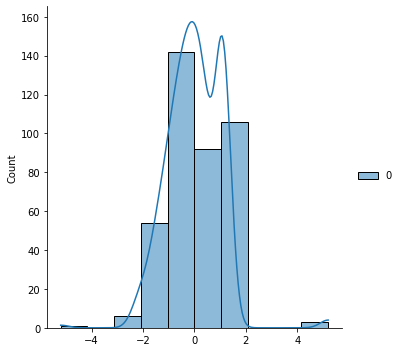

In [58]:
plt.show(sns.displot(TAX_qt, bins=10, kde=True))

In [59]:
print('Skewness original: ' + str(stats.skew(housing_train['TAX'])))
print('Skewness transformat: ' + str(stats.skew(TAX_qt)[0]))

Skewness original: 0.6618279117891875
Skewness transformat: 0.3608690033427857


In [60]:
scaler = PowerTransformer(method = 'yeo-johnson', standardize=True)
TAX_transformed = scaler.fit_transform(TAX_reshaped)

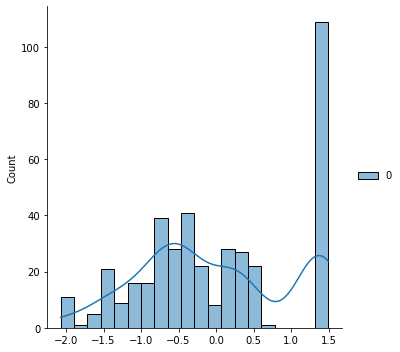

In [61]:
plt.show(sns.displot(TAX_transformed, bins=20, kde=True))

In [62]:
print('Skewness transformat: ' + str(stats.skew(TAX_transformed)[0]))

Skewness transformat: 0.07654484562739722


De totes formes, la transformació amb potències és molt efectiva.

#### AGE

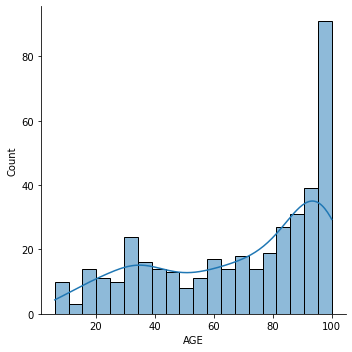

In [63]:
plt.show(sns.displot(housing_train['AGE'], bins=20, kde=True))

Un nou candidat a una transformació amb potències per la seva asimetria negativa, de totes maneres, la seva elevada asimetria pot complicar la normalització.

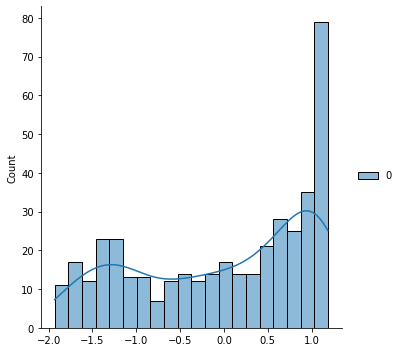

In [64]:
scaler = PowerTransformer(method = 'box-cox', standardize=True)

AGE_reshaped = np.array(housing_train['AGE']).reshape(-1, 1)

AGE_transformed = scaler.fit_transform(AGE_reshaped)

plt.show(sns.displot(AGE_transformed, bins = 20, kde=True))

In [65]:
print('Skewness original: ' + str(stats.skew(housing_train['AGE'])))
print('Skewness transformat: ' + str(stats.skew(AGE_transformed)[0]))

Skewness original: -0.5828331659938112
Skewness transformat: -0.41434051045425063


In [66]:
mmscaler = MinMaxScaler()
 
#reshape our array to prepare it for the mmscaler
dist_reshaped = np.array(housing_train['DIS']).reshape(-1,1)
 
#.fit_transform our reshaped data
dist_norm = mmscaler.fit_transform(dist_reshaped)

plt.show(sns.displot(AGE_transformed, bins = 20, kde=True))

El màxim tan notable a un extrem de la distribució fa poc efectiva la transformació.